In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = DataFrame({'key1': ['a', 'a', 'b', 'b', 'a'],
                'key2': ['one', 'two', 'one', 'two', 'one'],
                'data1': np.random.randn(5),
                'data2': np.random.randn(5)})

In [3]:
df

,data1,data2,key1,key2
0,-1.334861,0.251748,a,one
1,-0.845236,0.101138,a,two
2,0.694547,0.068779,b,one
3,0.483598,-1.906806,b,two
4,-0.223724,0.521479,a,one


访问data1，并根据key1调用groupby：

In [4]:
grouped = df['data1'].groupby(df['key1'])

In [5]:
grouped

变量grouped是一个GruopBy对象。它实际上还没有进行任何运算，只是含有一些有关分组键df\['key1']的中间数据而已。换句话说，该对象已经有了接下来对各组执行运算所需的一切信息。

In [6]:
grouped.mean()

key1
a   -0.801274
b    0.589073
Name: data1, dtype: float64

如果一次传入多个数组，就会得到不同的结果：

In [7]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()

In [8]:
means

key1  key2
a     one    -0.779292
      two    -0.845236
b     one     0.694547
      two     0.483598
Name: data1, dtype: float64

这里通过两个键对数据进行分组，得到的Series具有一个层次化索引（由唯一的键对组成）：

In [9]:
means.unstack()

key2,one,two
key1,,
a,-0.779292,-0.845236
b,0.694547,0.483598


上面这些示例中，分组键均为Series。实际上，分组键可以是任何长度适当的数组：

In [10]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])

In [11]:
years = np.array([2005, 2005, 2006, 2005, 2006])

In [12]:
df['data1'].groupby([states, years]).mean()

California  2005   -0.845236
            2006    0.694547
Ohio        2005   -0.425631
            2006   -0.223724
Name: data1, dtype: float64

还可以将列名（可以是字符串、数字或其他Python对象）用作分组键：

In [13]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.801274,0.291455
b,0.589073,-0.919013


In [14]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.779292  0.386613
     two  -0.845236  0.101138
b    one   0.694547  0.068779
     two   0.483598 -1.906806

在执行df.groupby('key1').mean()时，结果中没有key2列。这是因为df\['key2']不是数值数据（俗称“麻烦列”），所以被从结果中排除了。默认情况下，所有数值列都会被聚合，虽然有时可能会被过滤为一个子集。

In [15]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

## 对分组进行迭代
GroupBy对象支持迭代，可以产生一组二元元组（由分组名和数据块组成）。

In [16]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
      data1     data2 key1 key2
0 -1.334861  0.251748    a  one
1 -0.845236  0.101138    a  two
4 -0.223724  0.521479    a  one
b
      data1     data2 key1 key2
2  0.694547  0.068779    b  one
3  0.483598 -1.906806    b  two


对于多重键的情况，元组的第一个元素将会是由键值组成的元组：

In [17]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print(k1, k2)
    print(group)

a one
      data1     data2 key1 key2
0 -1.334861  0.251748    a  one
4 -0.223724  0.521479    a  one
a two
      data1     data2 key1 key2
1 -0.845236  0.101138    a  two
b one
      data1     data2 key1 key2
2  0.694547  0.068779    b  one
b two
      data1     data2 key1 key2
3  0.483598 -1.906806    b  two


将这些数据片段做成一个字典：

In [18]:
list(df.groupby('key1'))

[('a',       data1     data2 key1 key2
  0 -1.334861  0.251748    a  one
  1 -0.845236  0.101138    a  two
  4 -0.223724  0.521479    a  one), ('b',       data1     data2 key1 key2
  2  0.694547  0.068779    b  one
  3  0.483598 -1.906806    b  two)]

In [19]:
pieces = dict(list(df.groupby('key1')))

In [20]:
pieces

{'a':       data1     data2 key1 key2
 0 -1.334861  0.251748    a  one
 1 -0.845236  0.101138    a  two
 4 -0.223724  0.521479    a  one, 'b':       data1     data2 key1 key2
 2  0.694547  0.068779    b  one
 3  0.483598 -1.906806    b  two}

In [21]:
pieces['b']

,data1,data2,key1,key2
2,0.694547,0.068779,b,one
3,0.483598,-1.906806,b,two


groupby默认是在axis=0上进行分组的，我们可以根据dtype对列进行分组：

In [22]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [23]:
grouped = df.groupby(df.dtypes, axis=1)

In [24]:
dict(list(grouped))

{dtype('float64'):       data1     data2
 0 -1.334861  0.251748
 1 -0.845236  0.101138
 2  0.694547  0.068779
 3  0.483598 -1.906806
 4 -0.223724  0.521479, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

## 选取一个或一组列

对于大数据集，很可能只需要对部分列进行聚合。例如前面的数据集中，如果只需要计算data2列的平均值并以DataFrame形式得到结果：

In [25]:
df.groupby(['key1', 'key2'])[['data1']].mean()

data1
key1 key2          
a    one  -0.779292
     two  -0.845236
b    one   0.694547
     two   0.483598

这种索引操作所返回的对象是一个已分组的DataFrame（如果传入的是列表或数组）或已分组的Series（如果传入的是标量形式的单个列名）：

In [26]:
s_grouped = df.groupby(['key1', 'key2'])['data2']

In [27]:
s_grouped

In [28]:
s_grouped.mean()

key1  key2
a     one     0.386613
      two     0.101138
b     one     0.068779
      two    -1.906806
Name: data2, dtype: float64

## 通过字典或Series进行分组

In [29]:
people = DataFrame(np.random.randn(5, 5),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

In [30]:
people.iloc[2, 1:3] = np.nan

In [31]:
people

,a,b,c,d,e
Joe,-1.581052,-0.452923,-2.316563,-0.562177,-0.402412
Steve,-2.040625,1.379933,-0.447825,-0.079289,-1.503071
Wes,-0.084455,NaN,NaN,0.481381,0.358842
Jim,-1.360543,-1.195858,0.233248,0.341768,-1.064797
Travis,0.222364,1.047760,1.592926,2.155795,-0.673334


假设已知列的分组关系，并希望根据分组计算列的总计：

In [32]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f': 'orange'}

In [33]:
by_column = people.groupby(mapping, axis=1)

In [34]:
by_column.sum()

,blue,red
Joe,-2.878740,-2.436388
Steve,-0.527114,-2.163764
Wes,0.481381,0.274388
Jim,0.575017,-3.621199
Travis,3.748721,0.596790


Series也有同样的功能，它可以被看做一个固定大小的映射。  
对于上面那个例子，如果用Series作为分组键，则pandas会检查Series以确保其索引跟分组轴是对齐的：

In [35]:
map_series = Series(mapping)

In [36]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [37]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


## 通过函数进行分组
假设你希望根据人名的长度进行分组，虽然可以求取一个字符串长度数组，但其实仅仅传入len函数就可以了：

In [38]:
people.groupby(len).sum()

,a,b,c,d,e
3,-3.026050,-1.648782,-2.083315,0.260973,-1.108367
5,-2.040625,1.379933,-0.447825,-0.079289,-1.503071
6,0.222364,1.047760,1.592926,2.155795,-0.673334


将函数跟数组、列表、字典、Series混合使用也不是问题，因为任何东西最终都会被转换为数组：

In [39]:
key_list = ['one', 'one', 'one', 'two', 'two']

In [40]:
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -1.581052 -0.452923 -2.316563 -0.562177 -0.402412
  two -1.360543 -1.195858  0.233248  0.341768 -1.064797
5 one -2.040625  1.379933 -0.447825 -0.079289 -1.503071
6 two  0.222364  1.047760  1.592926  2.155795 -0.673334

## 根据索引级别分组
层次化索引数据集最方便的地方就在于它能够根据索引级别进行聚合。要实现该目的，通过level关键字传入级别编号或名称即可：

In [41]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                     [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])

In [42]:
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)

In [43]:
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -1.007603 -0.554142 -0.404137 -0.277230  0.028754
1     -0.380106  0.702614  0.366733 -0.105843  1.948931
2      0.336276 -0.690274 -0.701553 -1.392771 -1.117921
3      1.455323  0.206023  0.543952 -0.057640  0.483471

In [44]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## 数据聚合
聚合是任何能够从数组产生标量值的数据转换过程。  
quantile可以计算Series或DataFrame列的样本分位数：

In [45]:
df

,data1,data2,key1,key2
0,-1.334861,0.251748,a,one
1,-0.845236,0.101138,a,two
2,0.694547,0.068779,b,one
3,0.483598,-1.906806,b,two
4,-0.223724,0.521479,a,one


In [46]:
grouped = df.groupby('key1')

In [47]:
grouped['data1'].quantile(0.9)

key1
a   -0.348027
b    0.673452
Name: data1, dtype: float64

分位数quantile可参见http://www.cnblogs.com/brightyuxl/p/9815780.html

虽然quantile并没有明确地实现于GroupBy，但它是一个Series方法，所以这里是能用的。实际上，GroupBy会高效地对Series进行切片，然后对各片调用piece.quantile(0.9)，最后将这些结果组装成最终结果。

如果要使用你自己的聚合函数，只需将其传入aggregate或agg方法即可：

In [48]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [49]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,1.111136,0.420340
b,0.210949,1.975585


注意：有些方法（如describe）也是可以用在这里的，即使严格来讲，它们并非聚合运算：

In [50]:
grouped.describe().T

key1                a         b
data1 count  3.000000  2.000000
      mean  -0.801274  0.589073
      std    0.556871  0.149163
      min   -1.334861  0.483598
      25%   -1.090048  0.536336
      50%   -0.845236  0.589073
      75%   -0.534480  0.641810
      max   -0.223724  0.694547
data2 count  3.000000  2.000000
      mean   0.291455 -0.919013
      std    0.212965  1.396950
      min    0.101138 -1.906806
      25%    0.176443 -1.412910
      50%    0.251748 -0.919013
      75%    0.386613 -0.425117
      max    0.521479  0.068779

In [51]:
tips = pd.read_csv('tips.csv')

In [52]:
# 添加“小费占总额百分比”的列
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [53]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


## 面向列的多函数应用
对Series或DataFrame列的聚合运算其实就是使用aggregate（使用自定义函数）或调用诸如mean、std之类的方法。然而，你可能希望对不同的列使用不同的聚合函数，或一次应用多个函数。  
首先，根据sex和smoker对tips进行分组：

In [54]:
grouped = tips.groupby(['sex', 'smoker'])

注意，对于count、sum、mean等方法可以将函数名以字符串的形式传入：

In [55]:
grouped_pct = grouped['tip_pct']

In [56]:
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [57]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

你并非一定要接受GroupBy自动给出的那些列名，特别是lambda函数，它们的名称是&lt;lambda&gt;，这样的辨识度就很低了（通过函数的name属性看看就知道了）。  
如果传入的是一个由(name,function)元组组成的列表，则各元组的第一个元素就会被用作DataFrame的列名（可以将这种二元元组列表看作一个有序映射）：

In [58]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

对于DataFrame，你还可以定义一组应用于全部列的函数，或不同的列应用不同的函数。假设我们想要对tip_pct和total_bill列计算三个统计信息：

In [59]:
functions = ['count', 'mean', 'max'] 

In [60]:
result = grouped['tip_pct', 'total_bill'].agg(functions)

In [61]:
result

tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [62]:
result['tip_pct']

count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

跟前面一样，这里也可以传入带有自定义名称的元组列表：

In [63]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]

In [64]:
grouped['tip_pct', 'total_bill'].agg(ftuples)

tip_pct              total_bill           
              Durchschnitt Abweichung Durchschnitt Abweichung
sex    smoker                                                
Female No         0.156921   0.001327    18.105185  53.092422
       Yes        0.182150   0.005126    17.977879  84.451517
Male   No         0.160669   0.001751    19.791237  76.152961
       Yes        0.152771   0.008206    22.284500  98.244673

现在，假设你想要对不同的列应用不同函数，具体的办法是向agg传入一个从列名映射到函数的字典：

In [65]:
grouped.agg({'tip': np.max, 'size': 'sum'})

tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150

In [66]:
grouped.agg({'tip_pct': ['min', 'max', 'mean', 'std'],
             'size': 'sum'})

tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

只有将多个函数应用到至少一列时，DataFrame才会拥有层次化的列。

## 以“无索引”的形式返回聚合数据
到目前为止，所有示例中的聚合数据都有由唯一的分组键组成的索引（可能还是层次化的）。由于并不总是需要如此，所以你可以向groupby传入as_index=False以禁用该功能：

In [67]:
tips.groupby(['sex', 'smoker']).mean()

total_bill       tip      size   tip_pct
sex    smoker                                          
Female No       18.105185  2.773519  2.592593  0.156921
       Yes      17.977879  2.931515  2.242424  0.182150
Male   No       19.791237  3.113402  2.711340  0.160669
       Yes      22.284500  3.051167  2.500000  0.152771

In [68]:
tips.groupby(['sex', 'smoker'], as_index=False).mean()

,sex,smoker,total_bill,tip,size,tip_pct
0,Female,No,18.105185,2.773519,2.592593,0.156921
1,Female,Yes,17.977879,2.931515,2.242424,0.182150
2,Male,No,19.791237,3.113402,2.711340,0.160669
3,Male,Yes,22.284500,3.051167,2.500000,0.152771


## 分组级运算和转换
假设我们想要为一个DataFrame添加一个用于存放各索引分组平均值的列。一个办法是先聚合再合并：

In [69]:
df

,data1,data2,key1,key2
0,-1.334861,0.251748,a,one
1,-0.845236,0.101138,a,two
2,0.694547,0.068779,b,one
3,0.483598,-1.906806,b,two
4,-0.223724,0.521479,a,one


In [70]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')

In [71]:
k1_means

,mean_data1,mean_data2
key1,,
a,-0.801274,0.291455
b,0.589073,-0.919013


In [72]:
pd.merge(df, k1_means, left_on='key1', right_index=True)

,data1,data2,key1,key2,mean_data1,mean_data2
0,-1.334861,0.251748,a,one,-0.801274,0.291455
1,-0.845236,0.101138,a,two,-0.801274,0.291455
4,-0.223724,0.521479,a,one,-0.801274,0.291455
2,0.694547,0.068779,b,one,0.589073,-0.919013
3,0.483598,-1.906806,b,two,0.589073,-0.919013


虽然这样也行，但是不太灵活，你可以将该过程看做利用np.mean函数对两个数据列进行转换。这次我们使用transform方法：

In [73]:
people

,a,b,c,d,e
Joe,-1.581052,-0.452923,-2.316563,-0.562177,-0.402412
Steve,-2.040625,1.379933,-0.447825,-0.079289,-1.503071
Wes,-0.084455,NaN,NaN,0.481381,0.358842
Jim,-1.360543,-1.195858,0.233248,0.341768,-1.064797
Travis,0.222364,1.047760,1.592926,2.155795,-0.673334


In [74]:
key = ['one', 'two', 'one', 'two', 'one']

In [75]:
people.groupby(key).mean()

,a,b,c,d,e
one,-0.481048,0.297418,-0.361819,0.691666,-0.238968
two,-1.700584,0.092037,-0.107288,0.131240,-1.283934


In [76]:
people.groupby(key).transform(np.mean)

,a,b,c,d,e
Joe,-0.481048,0.297418,-0.361819,0.691666,-0.238968
Steve,-1.700584,0.092037,-0.107288,0.131240,-1.283934
Wes,-0.481048,0.297418,-0.361819,0.691666,-0.238968
Jim,-1.700584,0.092037,-0.107288,0.131240,-1.283934
Travis,-0.481048,0.297418,-0.361819,0.691666,-0.238968


不难看出，transform会将一个函数应用到各个分组，然后将结果放置到适当的位置上。  
现在，假设你希望从各组中减去平均值，为此我们先创建一个距平化函数（demeaning function），然后将其传给transform：

In [77]:
def demean(arr):
    return arr - arr.mean()

In [78]:
demeaned = people.groupby(key).transform(demean)

In [79]:
demeaned

,a,b,c,d,e
Joe,-1.100005,-0.750342,-1.954745,-1.253843,-0.163444
Steve,-0.340041,1.287895,-0.340537,-0.210529,-0.219137
Wes,0.396593,NaN,NaN,-0.210285,0.597810
Jim,0.340041,-1.287895,0.340537,0.210529,0.219137
Travis,0.703412,0.750342,1.954745,1.464128,-0.434366


检查一下demeaned现在的分组平均值是否为0：

In [80]:
demeaned.groupby(key).mean()

,a,b,c,d,e
one,3.700743e-17,0.0,0.0,-1.480297e-16,3.700743e-17
two,1.110223e-16,0.0,0.0,0.000000e+00,0.000000e+00


In [81]:
demeaned.groupby(key).mean().astype(int)

,a,b,c,d,e
one,0,0,0,0,0
two,0,0,0,0,0


## apply：一般性的“拆分-应用-合并”
apply会将待处理的对象拆分成多个片段，然后对各片段调用传入的函数，最后尝试将各片段组合到一起。  
回到之前的小费数据集，假设想要根据分组选出最高的5个tip_pct值。首先，编写一个选取指定列具有最大值的行的函数：

In [82]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [83]:
top(tips, n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


现在，如果对smoker分组并用该函数调用apply，就会得到：

In [84]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

如果传入apply的函数能够接受其他参数或关键字，则可以将这些内容放在函数名后面一并传入：

In [85]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  0.115982

In [86]:
result = tips.groupby('smoker')['tip_pct'].describe()

In [87]:
result.stack()

smoker       
No      count    151.000000
        mean       0.159328
        std        0.039910
        min        0.056797
        25%        0.136906
        50%        0.155625
        75%        0.185014
        max        0.291990
Yes     count     93.000000
        mean       0.163196
        std        0.085119
        min        0.035638
        25%        0.106771
        50%        0.153846
        75%        0.195059
        max        0.710345
dtype: float64

In [88]:
result.stack().unstack(0)

smoker,No,Yes
count,151.000000,93.000000
mean,0.159328,0.163196
std,0.039910,0.085119
min,0.056797,0.035638
25%,0.136906,0.106771
50%,0.155625,0.153846
75%,0.185014,0.195059
max,0.291990,0.710345


在GroupBy中，当你调用诸如describe之类的方法时，实际上只是应用了下面两条代码的快捷方式而已：

In [89]:
f = lambda x: x.describe()
tips.groupby('smoker')['tip_pct'].apply(f)

smoker       
No      count    151.000000
        mean       0.159328
        std        0.039910
        min        0.056797
        25%        0.136906
        50%        0.155625
        75%        0.185014
        max        0.291990
Yes     count     93.000000
        mean       0.163196
        std        0.085119
        min        0.035638
        25%        0.106771
        50%        0.153846
        75%        0.195059
        max        0.710345
Name: tip_pct, dtype: float64

## 禁止分组键
从上面的例子中可以看出，分组键会跟原始对象的索引共同构成结果对象中的层次化索引，将group_keys=False传入groupby即可禁止该效果：

In [90]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


## 分位数和桶分析
pandas有一些能根据指定面元或样本分位数将数据拆分成多块的工具（比如cut和qcut）。将这些函数跟groupby结合起来，就能非常轻松的实现对数据集的桶（bucket）或分位数（quantile）分析了。  
以下面这个简单的随机数据集为例，我们利用cut将其装入长度相等的桶中：

In [91]:
frame = DataFrame({'data1': np.random.randn(1000),
                   'data2': np.random.randn(1000)})

In [92]:
factor = pd.cut(frame.data1, 4)

In [93]:
factor[:10]

0     (-0.0182, 1.601]
1     (-0.0182, 1.601]
2    (-1.637, -0.0182]
3        (1.601, 3.22]
4    (-1.637, -0.0182]
5    (-1.637, -0.0182]
6     (-0.0182, 1.601]
7    (-1.637, -0.0182]
8    (-1.637, -0.0182]
9    (-1.637, -0.0182]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.263, -1.637] < (-1.637, -0.0182] < (-0.0182, 1.601] < (1.601, 3.22]]

由cut返回的Factor对象可直接用于groupby。因此我们可以像下面这样对data2做一些统计计算：

In [94]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [95]:
grouped = frame.data2.groupby(factor)

In [96]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-3.263, -1.637]",65.0,2.088797,0.082447,-1.986600
"(-1.637, -0.0182]",448.0,3.781575,-0.041433,-3.173390
"(-0.0182, 1.601]",432.0,3.404346,-0.023557,-2.301277
"(1.601, 3.22]",55.0,2.105437,0.266889,-1.904617


这些都是长度相等的桶。要根据样本分位数得到大小相等的桶，使用qcut即可。传入labels=False即可只获取分位数的编号。

In [97]:
# 返回分位数编号
grouping = pd.qcut(frame.data1, 10, labels=False)

In [98]:
grouped = frame.data2.groupby(grouping)

In [99]:
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,2.157411,0.004332,-2.592152
1,100.0,3.781575,0.161689,-2.172785
2,100.0,2.505643,-0.066081,-3.173390
3,100.0,2.696480,-0.119862,-2.566717
4,100.0,1.994712,-0.109097,-2.130898
5,100.0,3.404346,0.025837,-2.301277
6,100.0,2.080556,-0.064841,-2.264927
7,100.0,3.219364,0.003576,-2.088866
8,100.0,2.615161,-0.029411,-2.244287


## 示例：用特定于分组的值填充缺失值
对于缺失数据的清理工作，有时会用dropna将其滤除，而有时则可能会希望用一个固定值或由数据集本身所衍生出来的值去填充NA值。这时就得使用fillna这个工具了。下面的例子中，我们用平均值去填充NA值：

In [100]:
s = Series(np.random.randn(6))

In [101]:
s[::2] = np.nan

In [102]:
s

0         NaN
1    1.470493
2         NaN
3    0.547517
4         NaN
5   -1.185212
dtype: float64

In [103]:
s.fillna(s.mean())

0    0.277600
1    1.470493
2    0.277600
3    0.547517
4    0.277600
5   -1.185212
dtype: float64

假设你需要对不同的分组填充不同的值。只需将数据分组，并使用apply和一个能够对各数据块调用fillna的函数即可。

In [104]:
states = ['Ohio', 'New York', 'Vermont', 'Florida', 
          'Oregon', 'Nevada', 'California', 'Idaho']

In [105]:
group_key = ['East'] * 4 + ['West'] * 4

In [106]:
data = Series(np.random.randn(8), index=states)

In [107]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan

In [108]:
data

Ohio         -0.357098
New York      0.065580
Vermont            NaN
Florida       0.406528
Oregon        0.298634
Nevada             NaN
California    0.949608
Idaho              NaN
dtype: float64

In [109]:
data.groupby(group_key).mean()

East    0.038336
West    0.624121
dtype: float64

我们可以用分组平均值去填充NA值：

In [110]:
fill_mean = lambda g: g.fillna(g.mean())

In [111]:
data.groupby(group_key).apply(fill_mean)

Ohio         -0.357098
New York      0.065580
Vermont       0.038336
Florida       0.406528
Oregon        0.298634
Nevada        0.624121
California    0.949608
Idaho         0.624121
dtype: float64

此外也可以在代码中预定义各组的填充值。由于分组具有一个name属性，所以我们可以拿来用一下：

In [112]:
fill_values = {'East': 0.5, 'West': -1}

In [113]:
fill_func = lambda g: g.fillna(fill_values[g.name])

In [114]:
data.groupby(group_key).apply(fill_func)

Ohio         -0.357098
New York      0.065580
Vermont       0.500000
Florida       0.406528
Oregon        0.298634
Nevada       -1.000000
California    0.949608
Idaho        -1.000000
dtype: float64

## 示例：随机采样和排列
假设你想要从一个大数据集中随机抽取样本以进行蒙特卡罗模拟（Monte Carlo simulation）或其他分析工作。“抽取”的方式有很多，其中一些的效率会比其他的高很多。一个办法是，选取np.random.permutation(N)的前k个元素，其中N为完整数据的大小，k为期望的样本大小。下面构造一副英语型扑克牌的一个方式：

In [115]:
# 红桃（Hearts）、黑桃（Spades）、梅花（Clubs）、方片（Diamonds）
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)
deck = Series(card_val, index=cards)

现在我有了一个长度为52的Series，其索引为牌名，值则是21点或其他游戏中用于计分的点数：

In [116]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

从整副牌中抽出5张，代码如下：

In [117]:
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])

In [118]:
draw(deck)

3S      3
5C      5
7C      7
10C    10
9H      9
dtype: int64

假设你想要从每种花色中随机抽取两张牌，由于花色是牌名的最后一个字符，所以我们可以据此进行分组，并使用apply：

In [119]:
get_suit = lambda card: card[-1] # 只要最后一个字母就可以了

In [120]:
deck.groupby(get_suit).apply(draw, n=2)

C  7C     7
   QC    10
D  6D     6
   2D     2
H  5H     5
   JH    10
S  JS    10
   QS    10
dtype: int64

In [121]:
# 另一种办法
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

QC    10
4C     4
3D     3
QD    10
3H     3
8H     8
9S     9
8S     8
dtype: int64

## 示例：分组加权平均数和相关系数
根据groupby的“拆分-应用-合并”范式，DataFrame的列与列之间或两个Series之间的运算（比如分组加权平均）成为一种标准作业。

In [122]:
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                'data': np.random.randn(8),
                'weights': np.random.randn(8)})

In [123]:
df

,category,data,weights
0,a,-0.447882,1.642340
1,a,-0.243277,-0.946116
2,a,1.008893,-1.437099
3,a,-1.743619,-0.175511
4,b,-1.587820,-1.231519
5,b,-0.948167,0.156890
6,b,-1.250683,1.095439
7,b,-1.187255,0.496243


然后可以利用category计算分组加权平均数：

In [124]:
grouped = df.groupby('category')

In [125]:
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])

In [126]:
grouped.apply(get_wavg)

category
a    1.799746
b   -0.295022
dtype: float64

来看一个稍微实际点的例子——来自Yahoo！Finance的数据集，其中含有标准普尔500指数（SPX字段）和几只股票的收盘价：

In [127]:
# 设置第0行为索引行，默认index_col=None
close_px = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)

In [128]:
close_px.tail()

,AAPL,MSFT,XOM,SPX
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


计算一个由日收益率（通过百分数变化计算）与SPX之间的年度相关系数组成的DataFrame。

In [129]:
rets = close_px.pct_change().dropna()

In [130]:
rets.head()

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386


In [131]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [132]:
by_year = rets.groupby(lambda x: x.year)

In [133]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


计算列与列之间的相关系数：

In [134]:
# 苹果和微软的年度相关系数：
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

## 示例：面向分组的线性回归
顺着上一个例子继续，可以用groupby执行更为复杂的分组统计分析，只要函数返回的是pandas对象或标量值即可。例如，定义下面这个regress函数（利用statsmodels库）对各数据块执行普通最小二乘法（Ordinary Least Squares，OLS）回归：

In [135]:
import statsmodels.api as sm

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [136]:
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1
    result = sm.OLS(Y, X).fit()
    return result.params

现在，为了按年计算AAPL对SPX收益率的线性回归，我执行：

In [137]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


## 透视表和交叉表
透视表（pivot table）是各种电子表格程序和其他数据分析软件中一种常见的数据汇总工具。它根据一个或多个键对数据进行聚合，并根据行和列上的分组键将数据分配到各个矩形区域中。  
DataFrame有一个pivot_table方法，此外还有一个顶级的pandas.pivot_table函数，除能为groupby提供便利之外，pivot_table还可以添加分项小计（也叫做margins）。

In [138]:
tips.pivot_table(index=['sex', 'smoker'])

size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

这对groupby来说也是很简单的事情，现在假设我们只想聚合tip_pct和size，而且想根据day进行分组。将smoker放到列上，把day放到行上：

In [139]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'], columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
sex    day                                         
Female Fri   2.500000  2.000000  0.165296  0.209129
       Sat   2.307692  2.200000  0.147993  0.163817
       Sun   3.071429  2.500000  0.165710  0.237075
       Thur  2.480000  2.428571  0.155971  0.163073
Male   Fri   2.000000  2.125000  0.138005  0.144730
       Sat   2.656250  2.629630  0.162132  0.139067
       Sun   2.883721  2.600000  0.158291  0.173964
       Thur  2.500000  2.300000  0.165706  0.164417

还可以对这个表作进一步处理，传入margins=True添加分项小计。这将会添加标签为All的行和列，其值对应于单个等级中所有数据和分组统计。在下面这个例子中，All值为平均数：不单独考虑烟民和非烟民（All 列），不单独考虑行分组两个级别中的任何单项（All行）。

In [140]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'],
                 columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   2.500000  2.000000  2.111111  0.165296  0.209129  0.199388
       Sat   2.307692  2.200000  2.250000  0.147993  0.163817  0.156470
       Sun   3.071429  2.500000  2.944444  0.165710  0.237075  0.181569
       Thur  2.480000  2.428571  2.468750  0.155971  0.163073  0.157525
Male   Fri   2.000000  2.125000  2.100000  0.138005  0.144730  0.143385
       Sat   2.656250  2.629630  2.644068  0.162132  0.139067  0.151577
       Sun   2.883721  2.600000  2.810345  0.158291  0.173964  0.162344
       Thur  2.500000  2.300000  2.433333  0.165706  0.164417  0.165276
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

要使用其他的聚合函数，将其传给aggfunc即可。例如，使用count或len可以得到有关分组大小的交叉表：

In [141]:
tips.pivot_table('tip_pct', index=['sex', 'smoker'],
                 columns='day', aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
sex    smoker                               
Female No       2.0  13.0  14.0  25.0   54.0
       Yes      7.0  15.0   4.0   7.0   33.0
Male   No       2.0  32.0  43.0  20.0   97.0
       Yes      8.0  27.0  15.0  10.0   60.0
All            19.0  87.0  76.0  62.0  244.0

如果存在空的组合（也就是NA），你可能会希望设置一个fill_value:

In [142]:
tips.pivot_table('size', index=['time', 'sex', 'smoker'],
                 columns='day', aggfunc='sum', fill_value=0)

day                   Fri  Sat  Sun  Thur
time   sex    smoker                     
Dinner Female No        2   30   43     2
              Yes       8   33   10     0
       Male   No        4   85  124     0
              Yes      12   71   39     0
Lunch  Female No        3    0    0    60
              Yes       6    0    0    17
       Male   No        0    0    0    50
              Yes       5    0    0    23

## 交叉表：crosstab
交叉表（cross-tabulation，简称crosstab）是一种用于计算分组频率的特殊透视表。

In [143]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

## 示例：2012联邦选举委员会数据库

In [144]:
fec = pd.read_csv('P00000001-ALL.csv', parse_dates=True)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [145]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [146]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

不难看出，该数据中没有党派信息，因此最好把它加进去。通过unique可以获取全部的候选人名单：

In [147]:
unique_cands = fec.cand_nm.unique()

In [148]:
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [149]:
unique_cands[2]

'Obama, Barack'

最简单的办法是利用字典说明党派关系：

In [150]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican', 
           'Gingrich, Newt': 'Republican', 
           'Huntsman, Jon': 'Republican', 
           'Johnson, Gary Earl': 'Republican', 
           'McCotter, Thaddeus G': 'Republican', 
           'Obama, Barack': 'Democrat', 
           'Paul, Ron': 'Republican', 
           'Pawlenty, Timothy': 'Republican', 
           'Perry, Rick': 'Republican', 
           "Roemer, Charles E. 'Buddy' III": 'Republican', 
           'Romney, Mitt': 'Republican', 
           'Santorum, Rick': 'Republican'
}

现在，通过这个映射以及Series对象的map方法，你可以根据候选人姓名得到一组党派信息：

In [151]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [152]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [153]:
# 将其添加为一个新列
fec['party'] = fec.cand_nm.map(parties)

In [154]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

这里有两个需要注意的地方。第一，该数据既包括赞助也包括退款（负的出资额）：

In [155]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

为了简化分析过程，我限定该数据集只能有正的出资额：

In [156]:
fec = fec[fec.contb_receipt_amt > 0]

由于ObamaRomney是主要的两名候选人，所以我还专门准备了一个子集，只包含针对他们两个人的竞选活动的赞助信息：

In [157]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

## 根据职业和雇主统计赞助信息
基于职业的赞助信息统计是另一种经常被研究的统计任务。例如，律师们更倾向于资助民主党，而企业则更倾向于资助共和党。  
首先，根据职业计算出资总额：

In [158]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

不难看出，许多职业都涉及相同的基本工作类型，或者同一样东西有多种变体。下面的代码片段可以清理一些这样的数据（将一个职业信息映射到另一个）。  
注意这里巧妙地利用了dict.get，它允许没有映射关系的职业也能“通过”：

In [159]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED', 
    'INFORMATION REQUESTED' : 'NOT PROVIDED', 
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED', 
    'C.E.O.': 'CEO'
}

In [160]:
#如果没有提供相关映射，则返回x
f = lambda x: occ_mapping.get(x, x) # D.get(k[,d]) -> D[k] if k in D, else d.  d defaults to None.
fec.contbr_occupation = fec.contbr_occupation.map(f)

对雇主信息也进行了同样的处理：

In [161]:
emp_mapping = { 
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED', 
    'INFORMATION REQUESTED' : 'NOT PROVIDED', 
    'SELF' : 'SELF-EMPLOYED', 
    'SELF EMPLOYED' : 'SELF-EMPLOYED', 
}

In [162]:
# 如果没有提供相关映射，则返回x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

现在可以通过pivot_table根据党派和职业对数据进行聚合，然后过滤掉总出资额不足200万美元的数据：

In [163]:
by_occupation = fec.pivot_table('contb_receipt_amt', 
                                index='contbr_occupation', 
                                columns='party', 
                                aggfunc='sum')

In [164]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

In [165]:
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


把这些数据做成柱状图看起来会更加清楚（‘barh’表示水平柱状图）：

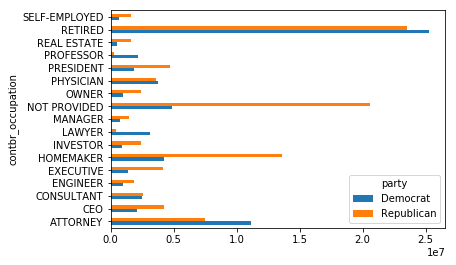

In [166]:
over_2mm.plot(kind='barh')

你可能还想了解一下对Obama和Romney总出资额最高的职业和企业。为此，我们先对候选人进行分组，然后使用本章前面介绍的那种求取最大值的方法：

In [167]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    # 根据key对total进行降序排列
    return totals.sort_values(ascending=False)[n:]

In [168]:
grouped = fec_mrbo.groupby('cand_nm')

In [169]:
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  PROFESSOR                                 2165071.08
               CEO                                       2073284.79
               PRESIDENT                                 1878509.95
               NOT EMPLOYED                              1709188.20
               EXECUTIVE                                 1355161.05
               TEACHER                                   1250969.15
               WRITER                                    1084188.88
               OWNER                                     1001567.36
               ENGINEER                                   951525.55
               INVESTOR                                   884133.00
               ARTIST                                     763125.00
               MANAGER                                    762883.22
               SELF-EMPLOYED                              672393.40
               STUDENT                                    6280

In [170]:
grouped.apply(get_top_amounts, 'contbr_employer', n =10)

cand_nm        contbr_employer                
Obama, Barack  SIDLEY AUSTIN LLP                  168254.00
               REFUSED                            149516.07
               DLA PIPER                          148235.00
               HARVARD UNIVERSITY                 131368.94
               IBM                                128490.93
               GOOGLE                             125302.88
               MICROSOFT CORPORATION              108849.00
               KAISER PERMANENTE                  104949.95
               JONES DAY                          103712.50
               STANFORD UNIVERSITY                101630.75
               COLUMBIA UNIVERSITY                 96325.12
               UNIVERSITY OF CHICAGO               88575.00
               AT&T                                88132.12
               US GOVERNMENT                       87689.00
               MORGAN & MORGAN                     87250.00
               VERIZON                             85

## 对出资额分组
还可以对该数据做另一种非常实用的分析：利用cut函数根据出资额的大小将数据离散化到多个面元中：

In [171]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])

In [172]:
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [173]:
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

然后根据候选人姓名以及面元标签对数据进行分组：

In [174]:
grouped = fec_mrbo.groupby(['cand_nm', labels])

In [175]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


从这个数据中可以看出，在小额赞助方面，Obama获得的数量比Romney多得多。你还可以对出资额求和并在面元内规格化，以便图形化显示两位候选人各种赞助额度的比例：

In [176]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)

In [177]:
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [178]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)

In [179]:
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


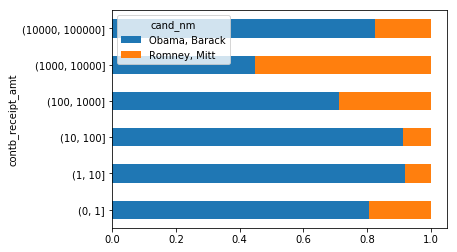

In [180]:
normed_sums[:-2].plot(kind='barh', stacked=True)

排除了最大的两个面元，因为这些不是由个人捐赠的。

## 根据州统计赞助信息
首先自然是根据候选人和州对数据进行聚合：

In [181]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])

In [182]:
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)

In [183]:
totals = totals[totals.sum(1) > 100000]

In [184]:
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


如果对各行除以总赞助额，就会得到各候选人在各州的总赞助额比例：

In [185]:
percent = totals.div(totals.sum(1), axis=0)

In [186]:
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


In [187]:
df1 = DataFrame(np.random.randint(1, 10, size=(4, 2)))
df1

,0,1
0,2,3
1,3,8
2,3,1
3,7,8


In [188]:
a = df1.sum(1)
a

0     5
1    11
2     4
3    15
dtype: int64

In [189]:
df1.div(a)

,0,1,2,3
0,0.4,0.272727,NaN,NaN
1,0.6,0.727273,NaN,NaN
2,0.6,0.090909,NaN,NaN
3,1.4,0.727273,NaN,NaN


In [190]:
df1.div(a, axis=0)

,0,1
0,0.400000,0.600000
1,0.272727,0.727273
2,0.750000,0.250000
3,0.466667,0.533333
